In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [80]:
df = pd.read_csv("./data/diabetes.csv")

In [81]:
df.shape

(768, 9)

In [82]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [84]:
df.isnull().values.any()

np.False_

In [85]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

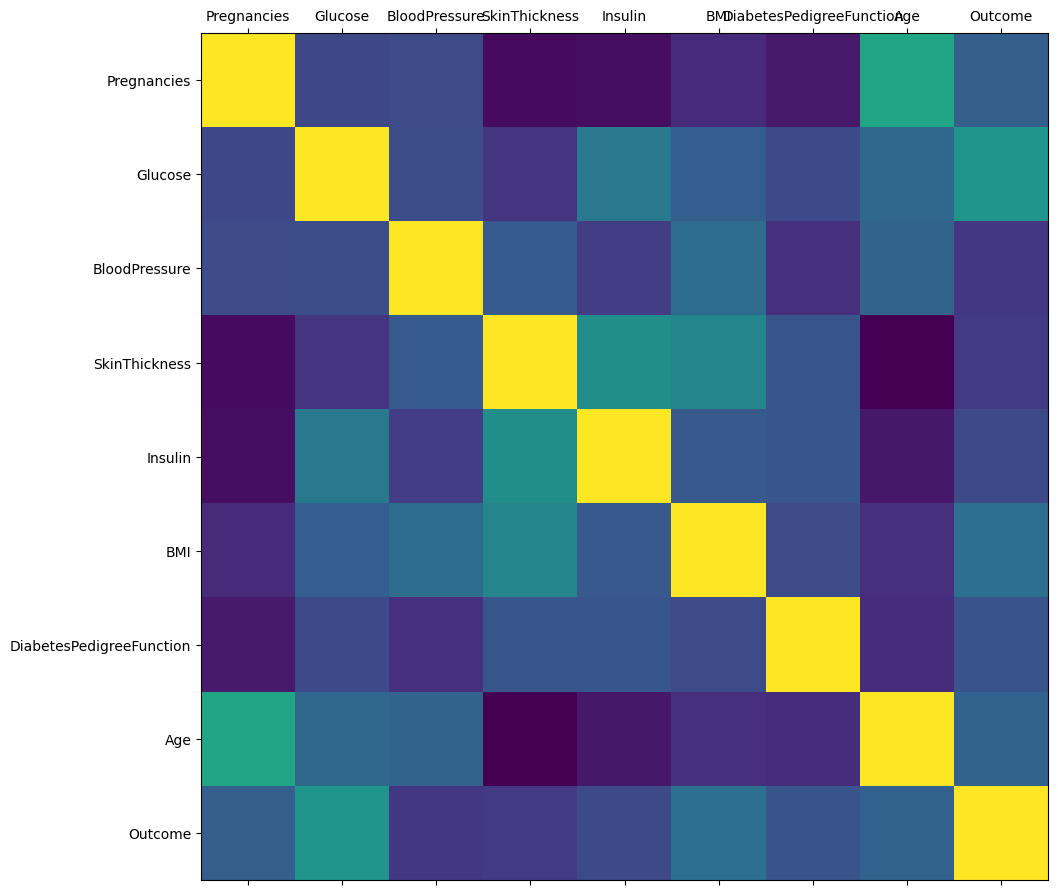

In [61]:
plot_corr(df)

In [86]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [87]:
del df['Age']

In [88]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


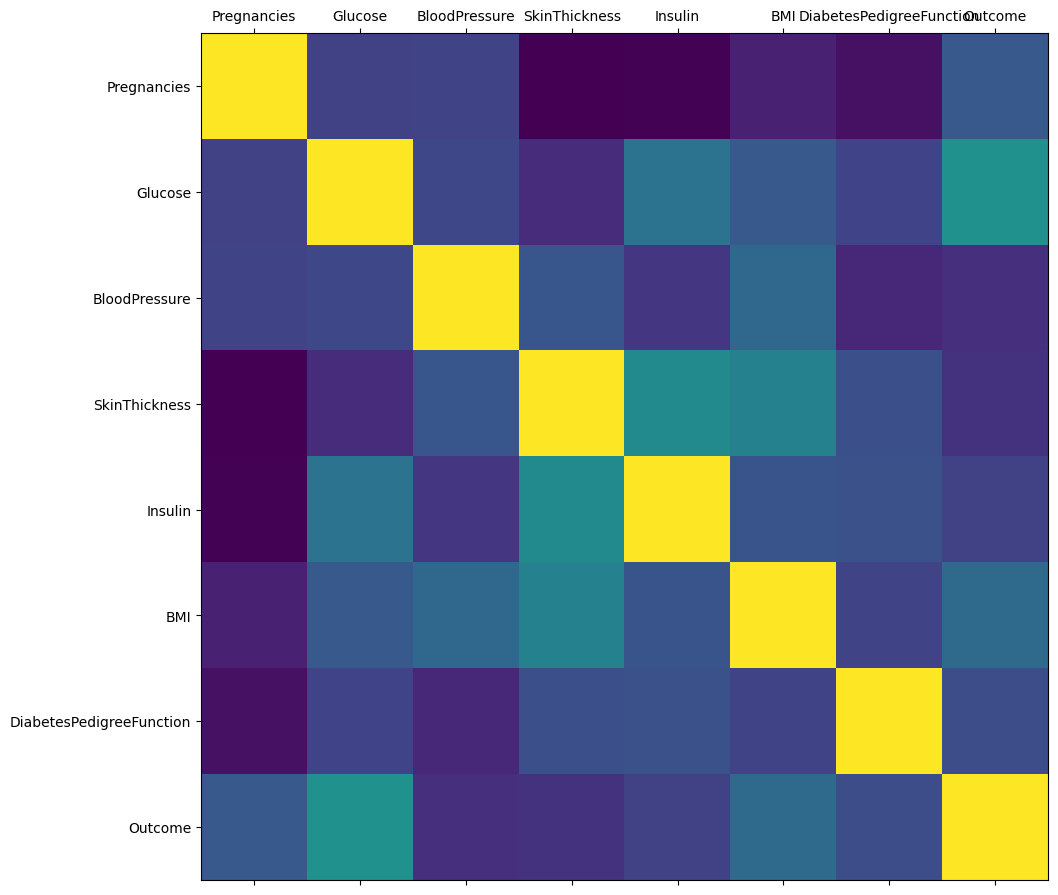

In [89]:
plot_corr(df)

In [90]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [91]:
df.isnull().values.any()

np.False_

In [92]:
num_obs = len(df)
num_true = len(df.loc[df["Outcome"] == 1])
num_false = len(df.loc[df["Outcome"] == 0])
print("jumlah terkena Outcome: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("jumlah tidak terkena Outcome: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

jumlah terkena Outcome: 268 (34.90%)
jumlah tidak terkena Outcome: 500 (65.10%)


In [97]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
predicted_class_names = ['Outcome']

x = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=split_test_size, random_state=42)

In [102]:
print("{0:0.2f}% ada pada training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(x_test)/len(df.index)) * 100))

69.92% ada pada training set
30.08% ada pada test set


In [103]:
print("jumlah Original terkena Outcome: {0} ({1:2.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes' == 1])/len(df.index)) * 100))
print("jumlah original tidak terkena Outcome: {0} ({1:2.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes' == 0])/len(df.index)) * 100))
print("")
print("Training True :{0} ({1:2.2f}%)").format(len (y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) *100.0))
print("Training False :{0} ({1:2.2f}%)").format(len (y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) *100.0))
print("")
print("Testing True :{0} ({1:2.2f}%)").format(len (y_train[y_test[:] == 1]), (len(y_train[y_test[:] == 1])/len(y_test) *100.0))
print("Testing False :{0} ({1:2.2f}%)").format(len (y_train[y_test[:] == 0]), (len(y_train[y_test[:] == 1])/len(y_test) *100.0))

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3779403637.py, line 1)